# 4.6.1 Stock Market Data

In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [111]:
Smarket = pd.read_csv('Data/Smarket.csv',usecols=range(1,10))
Smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


The describe function gives the number of observations, mean, standard deviation, minimum and maximum values of each column of the data. 25% and 75% refer to the lower and upper percentile of the data. 50% is the median. 

In [4]:
Smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


The correlation between the quantitative variables is shown below. If the correlation value is greater than 0.5, then there is a substantial correlation between two variables. 

From the table, it is observed the highest correlation is between $Volume$ and $Year$. The correlations between the $Lag$ variables and $Today$ are close to zero, indication little correlation between the present day's returns and previous returns.

In [5]:
Smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


It is seen that volume is increasing over the years.

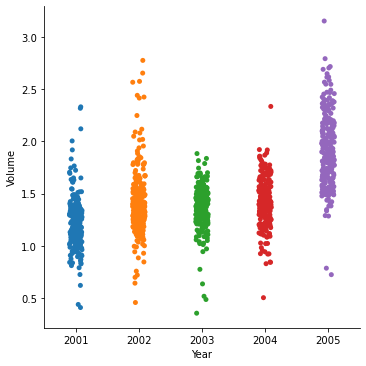

In [43]:
sns.catplot(x='Year', y='Volume', data=Smarket)

# 4.6.2 Logistic Regression

Using Generalized Linear Models to predict **Direction** using **Lag1** through **Lag5** and **Volume**. **Family = Binomial** is used to specify Logistic Regression. The dependent variable is **Direction** which has the values **Up, Down**.

In [258]:
import statsmodels.formula.api as smf

model = smf.glm(formula = 'Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', data=Smarket, family=sm.families.Binomial())
result = model.fit()
result.summary().tables[0]

Dep. Variable:,"['Direction[Down]', 'Direction[Up]']",No. Observations:,1250
Model:,GLM,Df Residuals:,1243
Model Family:,Binomial,Df Model:,6
Link Function:,logit,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-863.79
Date:,"Sat, 03 Apr 2021",Deviance:,1727.6
Time:,22:46:06,Pearson chi2:,1.25e+03
No. Iterations:,4,,
Covariance Type:,nonrobust,,


In [7]:
result.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,0.1260,0.241,0.523,0.601,-0.346,0.598
Lag1,0.0731,0.050,1.457,0.145,-0.025,0.171
Lag2,0.0423,0.050,0.845,0.398,-0.056,0.140
Lag3,-0.0111,0.050,-0.222,0.824,-0.109,0.087
Lag4,-0.0094,0.050,-0.187,0.851,-0.107,0.089
Lag5,-0.0103,0.050,-0.208,0.835,-0.107,0.087
Volume,-0.1354,0.158,-0.855,0.392,-0.446,0.175


Printing the probability predicted for the first ten datapoints, 

In [8]:
glm_probs = result.predict()
glm_probs[:10]

array([0.49291587, 0.51853212, 0.51886117, 0.48477764, 0.48921884,
       0.49304354, 0.50734913, 0.49077084, 0.48238647, 0.51116222])

**Direction** is encoded as **0** when **Up** and **1** when **Down**.

In [13]:
print(np.column_stack((Smarket["Direction"].to_numpy().flatten(), 
                       result.model.endog)))

[['Up' 0.0]
 ['Up' 0.0]
 ['Down' 1.0]
 ...
 ['Up' 0.0]
 ['Down' 1.0]
 ['Down' 1.0]]


Unfortunately, sklearn has this weird condition where they put their predictions to columns and true labels to rows, hence their confusion matrix appears as

```
TN | FP
FN | TP
``` 
instead of 

```
TP | FP
FN | TN
``` 

I transposed the matrix instead. I also don't use the ConfusionMatrixDisplay or other functions from sklearn as it is more confusing and it does not provude a functionality to switch rows and columns. A pity, as it is a good function with builtin row and column titles. Instead, I plot it using the seaborn library. 

In [259]:
prediction = ["Down" if x > 0.5 else "Up" for x in glm_probs]

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
cm = (confusion_matrix(Smarket['Direction'], prediction, labels=['Down','Up']))
print(classification_report(Smarket['Direction'], prediction))

              precision    recall  f1-score   support

        Down       0.51      0.24      0.33       602
          Up       0.53      0.78      0.63       648

    accuracy                           0.52      1250
   macro avg       0.52      0.51      0.48      1250
weighted avg       0.52      0.52      0.48      1250



The **fmt** parameter is used to format the values printed in the confusion matrix. **cmap** gives the color map for the image. **annot** is used to write each data value in the cell. 

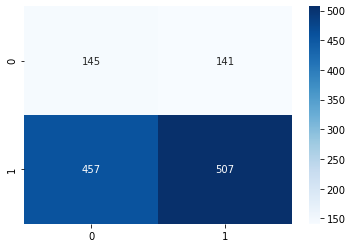

In [79]:
sns.heatmap(cm.T,annot=True,cmap="Blues",fmt='g') # font size
plt.show()

The diagonal elements indicate the number of correct predictions, there are 507+145 = 642 correct predictions.  The accuracy is 52%, which is better than random guessing but this is misleading as the accuracy is on the training data. Hence the **training error rate** is 100 - 52% = 48%. To generate a more realistic error rate, we use only the data from 2001 to 2004 and use this to predict the results of 2005. 

### Separating training and testing data

In [88]:
train_data = Smarket.loc[Smarket['Year'] != 2005]
test_data = Smarket.loc[Smarket['Year'] == 2005]
train_data

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
...,...,...,...,...,...,...,...,...,...
993,2004,0.046,0.342,0.904,0.038,-0.749,0.9561,-0.431,Down
994,2004,-0.431,0.046,0.342,0.904,0.038,0.9220,0.715,Up
995,2004,0.715,-0.431,0.046,0.342,0.904,0.9830,-0.007,Down
996,2004,-0.007,0.715,-0.431,0.046,0.342,0.9259,0.008,Up


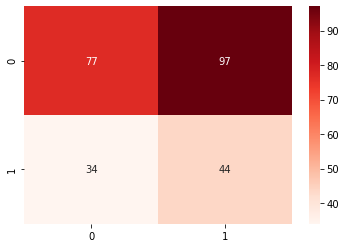

In [92]:
model = smf.glm(formula = 'Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', data=train_data, family=sm.families.Binomial())
result = model.fit()

new_predictions = result.predict(test_data)
new_predictions = ["Down" if x > 0.5 else "Up" for x in new_predictions]

cm = (confusion_matrix(test_data['Direction'], new_predictions, labels=['Down','Up']))
sns.heatmap(cm.T,annot=True,cmap="Reds",fmt='g') # font size
plt.show()

In [93]:
print(classification_report(test_data['Direction'], new_predictions))

              precision    recall  f1-score   support

        Down       0.44      0.69      0.54       111
          Up       0.56      0.31      0.40       141

    accuracy                           0.48       252
   macro avg       0.50      0.50      0.47       252
weighted avg       0.51      0.48      0.46       252



As the results are disappointing, we remove the variables that have a large p-value associated with the dependent variable (Direction). 

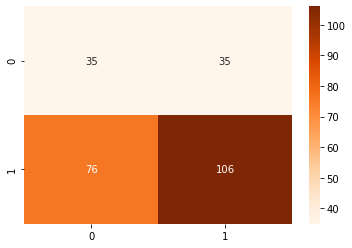

In [95]:
model = smf.glm(formula = 'Direction~Lag1+Lag2', data=train_data, family=sm.families.Binomial())
result = model.fit()

new_predictions = result.predict(test_data)
new_predictions = ["Down" if x > 0.5 else "Up" for x in new_predictions]

cm = (confusion_matrix(test_data['Direction'], new_predictions, labels=['Down','Up']))
sns.heatmap(cm.T,annot=True,cmap="Oranges",fmt='g') # font size
plt.show()

In [96]:
print(classification_report(test_data['Direction'], new_predictions))

              precision    recall  f1-score   support

        Down       0.50      0.32      0.39       111
          Up       0.58      0.75      0.66       141

    accuracy                           0.56       252
   macro avg       0.54      0.53      0.52       252
weighted avg       0.55      0.56      0.54       252



The accuracy increases to 56% percent when using the variables that seemed to have the highest predictive power. The precision is 58%, indicating an accuracy of 58% when predicting an increase in the market. It is wise to check if this improvement is really due to the predictors or due to random chance.

# 4.6.3 Linear Discriminant Analysis

*usecols* is used to indicate which columns to use, the index column is set to the Year and the dates are parsed using parse_dates.

In [178]:
Smarket = pd.read_csv('Data/Smarket.csv',usecols=range(1,10), index_col=0, parse_dates=True)
Smarket

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...
2005-01-01,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
2005-01-01,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
2005-01-01,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up


In [179]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

train_data = Smarket[:'2004'][['Lag1', 'Lag2']]
train_y =  Smarket[:'2004']['Direction']
train_data

,Lag1,Lag2
Year,,
2001-01-01,0.381,-0.192
2001-01-01,0.959,0.381
2001-01-01,1.032,0.959
2001-01-01,-0.623,1.032
2001-01-01,0.614,-0.623
...,...,...
2004-01-01,0.046,0.342
2004-01-01,-0.431,0.046
2004-01-01,0.715,-0.431


The priors refer to the prior probabilities of the each class, 0.49 for **Down** and 0.50 for **Up**. This means 49% of the training obsevations correspond to days during which the market went down. 

In [220]:
test_data = Smarket['2005':][['Lag1', 'Lag2']]
test_y =  Smarket['2005':]['Direction']

LDA = LinearDiscriminantAnalysis()
model = LDA.fit(train_data, train_y)

print(model.priors_)
print(model.coef_)

[0.49198397 0.50801603]
[[-0.05544078 -0.0443452 ]]


The LDA model directly predicts the categorical value, hence I encode it to plot the data with the colour of the datapoints corresponding to the Direction and the axes containing the two predictor variables. 

In [221]:
pred_y = model.predict(test_data)
pred_y_encoded = [0 if x == "Down" else 1 for x in pred_y]
test_y_encoded = [0 if x == "Down" else 1 for x in test_y]

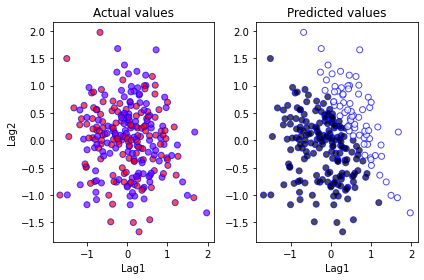

In [222]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.title('Actual values')
plt.xlabel('Lag1')
plt.ylabel('Lag2')
plt.scatter(
    test_data.iloc[:,0],
    test_data.iloc[:,1],
    c=test_y_encoded,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

plt.subplot(1, 2, 2) # index 2
plt.title('Predicted values')
plt.xlabel('Lag1')
plt.scatter(
    test_data.iloc[:,0],
    test_data.iloc[:,1],
    c=pred_y_encoded,
    cmap='binary',
    alpha=0.7,
    edgecolors='b'
)
plt.tight_layout()  #to increase spacing between subplots

From the scatterplot on the right, we can see the LDA model fits to the data. 
However, if we look at the actual values, there is no such linear relationship that can be deduced using the variables Lag1 and Lag2. This explains why the model has such a low performance.  

On plotting the confusion matrix of the LDA model, the results are identical to that of the Logistic Regression model as both of them produce linear decision boundaries. 

              precision    recall  f1-score   support

        Down       0.50      0.32      0.39       111
          Up       0.58      0.75      0.66       141

    accuracy                           0.56       252
   macro avg       0.54      0.53      0.52       252
weighted avg       0.55      0.56      0.54       252



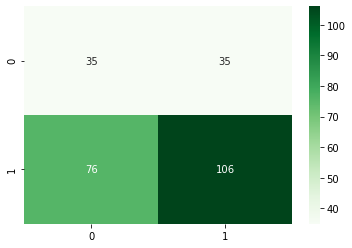

In [223]:
print(classification_report(Smarket['2005':]['Direction'], pred_y))
cm = (confusion_matrix( Smarket['2005':]['Direction'], pred_y, labels=['Down','Up']))
sns.heatmap(cm.T,annot=True,cmap="Greens",fmt='g') # font size
plt.show()

We can use different thresholds for the posterior probability data, however in this case it does not seem likely to improve the performance as the decision boundary will still be a linear one. Instead, we try a non-linear boundary next.

# 4.6.4 Quadratic Discriminant Analysis

              precision    recall  f1-score   support

        Down       0.57      0.21      0.30       111
          Up       0.58      0.88      0.70       141

    accuracy                           0.58       252
   macro avg       0.58      0.54      0.50       252
weighted avg       0.58      0.58      0.53       252



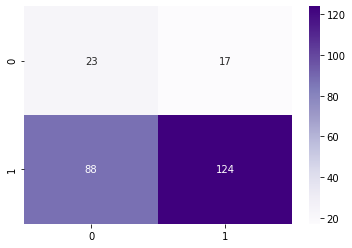

In [225]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

train_data = Smarket[:'2004'][['Lag1', 'Lag2']]
train_y = Smarket[:'2004']['Direction']
test_data = Smarket['2005':][['Lag1', 'Lag2']]
test_y = Smarket['2005':]['Direction']

QDA = QuadraticDiscriminantAnalysis()
model = QDA.fit(test_data, test_y)
pred_y = model.predict(test_data)


print(classification_report(Smarket['2005':]['Direction'], pred_y))
cm = (confusion_matrix( Smarket['2005':]['Direction'], pred_y, labels=['Down','Up']))
sns.heatmap(cm.T,annot=True,cmap="Purples",fmt='g') # font size
plt.show()

# 4.6.5 K-Nearest Neighbours

              precision    recall  f1-score   support

        Down       0.43      0.39      0.41       111
          Up       0.55      0.59      0.57       141

    accuracy                           0.50       252
   macro avg       0.49      0.49      0.49       252
weighted avg       0.50      0.50      0.50       252



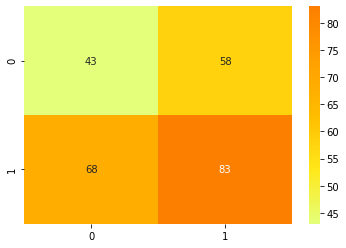

In [216]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=1)
model = KNN.fit(train_data, train_y)
pred_y = model.predict(test_data)

print(classification_report(Smarket['2005':]['Direction'], pred_y))
cm = (confusion_matrix( Smarket['2005':]['Direction'], pred_y, labels=['Down','Up']))
sns.heatmap(cm.T,annot=True,cmap="Wistia",fmt='g') # font size
plt.show()

With k=1, the accuracy is only 50%. Repeating the analysis with k=3

              precision    recall  f1-score   support

        Down       0.47      0.43      0.45       111
          Up       0.58      0.61      0.59       141

    accuracy                           0.53       252
   macro avg       0.52      0.52      0.52       252
weighted avg       0.53      0.53      0.53       252



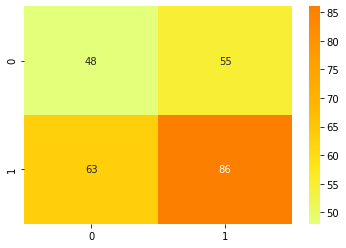

In [226]:
KNN = KNeighborsClassifier(n_neighbors=3)
model = KNN.fit(train_data, train_y)
pred_y = model.predict(test_data)

print(classification_report(Smarket['2005':]['Direction'], pred_y))
cm = (confusion_matrix( Smarket['2005':]['Direction'], pred_y, labels=['Down','Up']))
sns.heatmap(cm.T,annot=True,cmap="Wistia",fmt='g') # font size
plt.show()

The accuracy increases from 50% to 53% but QDA remains the best classifier compared to Logistic Regression, Linear Discriminant Analysis and K Nearest Neighbours with an accuracy of 58%.. 

# 4.6.6 An Application to Caravan Insurance Data

The caravan dataset indicates whether or not a given individual purchases a caravan insurance policy.

In [260]:
Caravan = pd.read_csv('Data/Caravan.csv',usecols=range(1,87))
Caravan

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,No
5818,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
5819,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,Yes
5820,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,No


The describe method only gives information on quantitative variables. 

In [232]:
Caravan.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,8.000000,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000


We check how many people have purchased an insurance policy for a caravan. The dataset is highly imbalanced with only 6% of the people purchasing insurance.

In [261]:
print(Caravan['Purchase'].value_counts(normalize=True)*100)
Caravan['Purchase'].value_counts()

No     94.022673
Yes     5.977327
Name: Purchase, dtype: float64


No     5474
Yes     348
Name: Purchase, dtype: int64

To apply the KNN classifier on the dataset, the scale of the predictor variables need to be considered. Variables that hve a large scale have a more significant effect on the *distance* between observations in contrast to variables that are on a small scale. To handle this, we standardize the data. 

When we standardize the data, we convert it to a **Gaussian with zero mean and unit variance** as many of the models assume the features are centered around zero and have a variance in the same order. Features that have larger variance might dominate the function and prevent the estimator from learning from other features correctly. 

I use the entire dataset when standardizing for simplicity. In practice, the scaler is fitted on the train data and test data is scaled using this scaler. 

In [262]:
from sklearn import preprocessing
X = Caravan.drop(columns=['Purchase'])  #excluding qualitative variable Purchase
scaler = preprocessing.StandardScaler().fit(X)

X_scaled = scaler.transform(X)
print(X_scaled.mean(axis=0))  #values are extremely close to 0
print(X_scaled.std(axis=0))

[-7.74982201e-17 -1.61403773e-16 -2.09916439e-16  2.15408438e-16
 -2.92906659e-17 -1.22044441e-17  7.93288867e-17 -1.40351107e-17
  9.51946640e-17 -1.47673774e-16 -1.58657773e-17 -1.51335107e-16
 -1.58657773e-17  6.59039982e-17 -7.07857758e-17 -5.24791096e-17
  1.01296886e-16  5.94966650e-17 -9.15333308e-18  5.43097763e-17
 -6.10222205e-19 -4.82075542e-17  9.76355528e-17 -9.76355528e-17
 -3.96644433e-17  5.98017761e-17  1.83066662e-18  8.17697755e-17
  8.36004421e-17 -2.07475550e-17 -3.78337767e-17 -2.54462660e-16
  1.89168884e-17  1.83066662e-18  5.30893319e-17 -1.52555551e-17
 -9.03128864e-17  2.19679994e-17 -4.63768876e-17  2.56293326e-17
  1.52555551e-17  1.35164218e-16 -1.55606662e-16  2.44088882e-17
 -2.80702214e-17  3.05111103e-17 -1.31197774e-16 -2.80702214e-17
  4.33257766e-17  7.32266646e-18 -1.52555551e-17  4.69871098e-17
  1.26621108e-17  5.36995541e-17  3.66133323e-17  2.68497770e-17
 -2.80702214e-17  7.01755536e-18  2.44088882e-17 -5.79711095e-18
 -8.54311087e-18 -2.19679

In [263]:
train_data = X_scaled[1000:]
train_y = Caravan['Purchase'][1000:]
test_data = X_scaled[:1000]
test_y = Caravan['Purchase'][:1000]

#### Using k = **1**
The percentage of individuals correctly predicted to take caravan insurance is low (12%). 

              precision    recall  f1-score   support

          No       0.95      0.93      0.94       941
         Yes       0.12      0.15      0.13        59

    accuracy                           0.88      1000
   macro avg       0.53      0.54      0.53      1000
weighted avg       0.90      0.88      0.89      1000



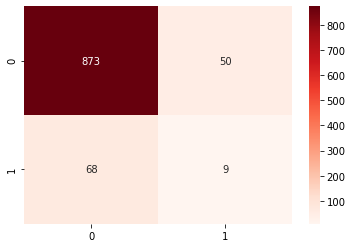

In [264]:
KNN = KNeighborsClassifier(n_neighbors=1)
model = KNN.fit(train_data, train_y)
pred_y = model.predict(test_data)

print(classification_report(Caravan[:1000]['Purchase'], pred_y))
cm = (confusion_matrix(Caravan[:1000]['Purchase'], pred_y, labels=['No','Yes']))
sns.heatmap(cm.T,annot=True,cmap="Reds",fmt='g') # font size
plt.show()

#### Using k = **3**

              precision    recall  f1-score   support

          No       0.94      0.98      0.96       941
         Yes       0.20      0.08      0.12        59

    accuracy                           0.93      1000
   macro avg       0.57      0.53      0.54      1000
weighted avg       0.90      0.93      0.91      1000



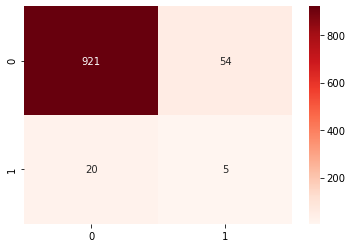

In [265]:
KNN = KNeighborsClassifier(n_neighbors=3)
model = KNN.fit(train_data, train_y)
pred_y = model.predict(test_data)

print(classification_report(Caravan[:1000]['Purchase'], pred_y))
cm = (confusion_matrix(Caravan[:1000]['Purchase'], pred_y, labels=['No','Yes']))
sns.heatmap(cm.T,annot=True,cmap="Reds",fmt='g') # font size
plt.show()

#### Using k = **5**

              precision    recall  f1-score   support

          No       0.94      0.99      0.97       941
         Yes       0.27      0.07      0.11        59

    accuracy                           0.93      1000
   macro avg       0.61      0.53      0.54      1000
weighted avg       0.90      0.93      0.92      1000



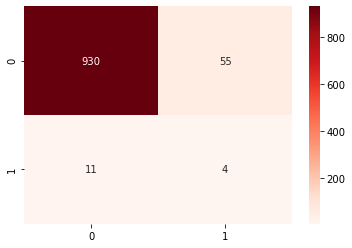

In [253]:
KNN = KNeighborsClassifier(n_neighbors=5)
model = KNN.fit(train_data, train_y)
pred_y = model.predict(test_data)

print(classification_report(Caravan[:1000]['Purchase'], pred_y))
cm = (confusion_matrix(Caravan[:1000]['Purchase'], pred_y, labels=['No','Yes']))
sns.heatmap(cm.T,annot=True,cmap="Reds",fmt='g') # font size
plt.show()

Using k = **3** and k = **5** increases the prediction rate of individuals that take caravan insurance to 19% and 27% respectively. 

#### Comparison with Logistic Regression Model

In [268]:
columns = "+".join(Caravan.columns.difference(['Purchase']))
formula = 'Purchase~'+columns
model = smf.glm(formula=formula, data=Caravan, family=sm.families.Binomial())
result = model.fit()

D:\tools\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


In [ ]:
pred_y = result.predict(test_data)
pred_y = ["Yes" if x > 0.5 else "No" for x in pred_y]

cm = (confusion_matrix(Caravan[:1000]['Purchase'], pred_y, labels=['Yes','No']))
sns.heatmap(cm.T,annot=True,cmap="Oranges",fmt='g') # font size
plt.show()

#### Appendix: